C:\Users\linus\AppData\Local\Temp\ipykernel_22552\227713881.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=[f'Keypoint {i+1}' for i in range(5)])


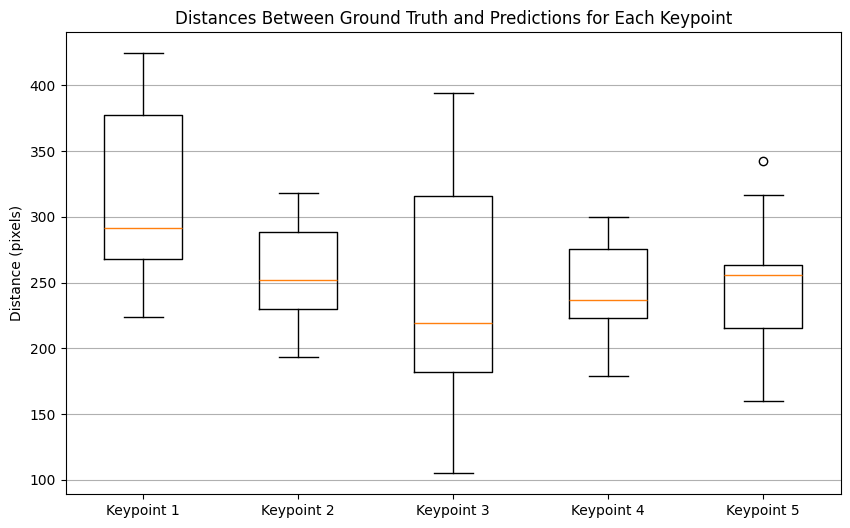

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON data
with open(r'C:\Users\linus\MantisAI\MantisAI\3_Model\predictionsUnfreezeMobileNet.json', 'r') as file:
    data = json.load(file)

# Function to calculate Euclidean distance
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Initialize lists to hold distances for each keypoint
keypoint_distances = {i: [] for i in range(5)}

# Calculate distances for each keypoint
for item in data:
    predictions = item['predictions']
    ground_truth = item['ground_truth']
    for i in range(5):
        distance = calculate_distance(predictions[i], ground_truth[i])
        keypoint_distances[i].append(distance)

# Prepare data for boxplot
boxplot_data = [keypoint_distances[i] for i in range(5)]

# Plot boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'Keypoint {i+1}' for i in range(5)])
plt.title('Distances Between Ground Truth and Predictions for Each Keypoint')
plt.ylabel('Distance (pixels)')
plt.grid(axis='y')
plt.show()
